# Projectile Apogee in Fluid Media under a Potential Field

S. Truax, 2018-12

__Summary__

The goal of this analysis is to calculate a realistic estimate of the maximum reach (i.e. apogee) of large-caliber small arms fire from the ground. Many analyses consider only the gravitational potential, which yields grossly unrealistic estimates on the order of 30 km or greater of apogee. However, it is known from practical experience in warfare that aircraft are typically safe from small-arms fire at altitudes of 3000 m or greater.

This notebook shows graphically the maximum displacement  $x_{max}$ (apogee) achieved by a projectile fired in the opposite direction of a graviational field $\textbf{g}$. Two scenarios are considered:

 1.  Gravitational acceleration $g$ and an inviscid drag force $F_{drag}$  acting against the projectile
 2.  An additional viscous force $F_{viscous}$  acting against the projectile. 

The apogee achieved by the projectile under both conditions, given an initial velocity $v_{0}$, will be found. Differential equations for each case will be obtained and solved using the `scipy.integrate.ode` library of `numpy`.




## Case 1: Governing Equations

In the following equations, only a single degree-of-freedom, parallel to the force of the potential, is considered. Given a projectile of mass $m$, the forces acting on the projectile under case (1) are:

<center>$\Sigma F = -mg-\frac{1}{2}\rho v^{2}c_{d}A = m \frac{dv}{dt}$</center>

where $c_d$ is a dimensionless drag coefficient under inviscid fluid assumptions. Given that the Reynolds number is high for this problem (due to the high velocity of the projectile), viscous forces are assumed to be negligible, thus only the inviscid drag force will be considered. 

The force balance equation thus yields the following differential equation:

<center>$\frac{dv}{dt} +\frac{1}{2m}\rho v^{2}c_{d}A = -g$</center>



# Numerical Solution

Consider the problem applied to a Speer .50 caliber bullet. The parameters for the problem become:

 - $v_{0} = 928 \frac{m}{s}$, the muzzle velocity
 - $m = 4.2 \cdot 10^{-2} kg$, the projectile mass
 - $c_d = 0.82$, the drag coefficient for a long cylinder
 - $A = 3.14 \cdot 10^{-4} m^{2}$, the reference area of the projectile. 
 - $\rho = 1.225 kg/m^{3}$, the density of air
 

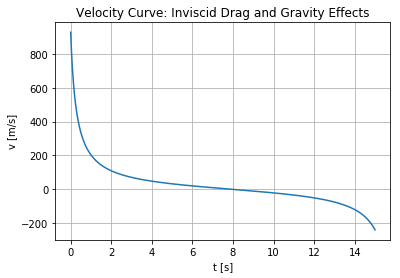

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

g = 9.8
v0 = 928
m = 4.2e-2
c_d = 0.82
A = 3.14e-4
rho = 1.225

def dv_dt(v,t):
    return -g - (1/(2*m))*rho*(v**2)*c_d*A

ts = np.linspace(0,15,10000)
vs = odeint(dv_dt, v0, ts)
vs = np.array(vs).flatten()

plt.title('Velocity Curve: Inviscid Drag and Gravity Effects')
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.plot(ts, vs)
plt.grid(True, which='both')
plt.show()


## Apogee Calculation
Calculate the apogee in terms of displacement by finding $t_f$ for which $v=0$. Then integrate $v(t)$ up to $t_f$. 


In [5]:
import scipy.integrate as integrate

zero_crossing = np.where(np.diff(np.sign(vs)))
x_max_inv = integrate.simps(vs[0:zero_crossing[0][0]], ts[0:zero_crossing[0][0]])

print("Apogee with only inviscid drag forces:",x_max_inv)



('Apogee with only inviscid drag forces:', 772.5894088510614)


# Case 2: Transition from Inviscid to Viscous Flow

In the above solution, only the inviscid forces are considered. In reality, viscous forces would eventually dominate as the velocity decreases. A what point this transition occurs is determined by the parameters of the problem.

Now the task is to estimate the velocity $v$ for which $F_{viscous} \approx F_{drag}$ (i.e. the transition point). 
 
Consider the modified force balance:


<center>$\frac{dv}{dt} +\frac{1}{2m}\rho v^{2}c_{d}A + \frac{1}{m}bv  = -g$</center>

where the $b$ is a linear viscous damping coefficient such that $F_{viscous} = bv$. Using a dimensional analysis to get an order-of-magnitude estimate for $b$, consider the Reynolds number $Re$ of the problem:

<center>$Re = \frac{\text{inertial forces}}{\text{viscous forces}}=\frac{\text{inertial forces}}{\frac{\text{dynamic viscosity} \cdot \text{area}}{\text{distance}} \cdot{\text{velocity}}}$</center>

Since the viscous force $F_{viscous} = bv$ is velocity-proportional, an estimate for $b$ is obtained from the combination of parameters $\frac{\text{dynamic viscosity} \cdot \text{area}}{\text{distance}}$ .

From this estimate, the transition point in terms of velocity is given by:

<center>$\frac{1}{2}\rho v^{2}c_{d}A \approx bv $</center>

which yields:


<center>$ v_{transition} \approx \frac{2\mu}{c_{d}\rho{L}} $</center>


# Numerical Solution

The following values for dynamic viscosity, area, and characteristic length are used:

 - $A = 3.14 \cdot 10^{-4} m^{2}$, the reference area of the projectile. 
 - $L = 4 \cdot 10^{-2} m$, length of projectile. 
 - $\mu = 1.81 \cdot 10^{-5} Pa \cdot s$, dynamic viscosity of air at 15 degrees C. 
 
These parameter values give $b = 1.42 \cdot 10^{-7} \frac{kg}{s}$ .  Furthermore, $ v_{transition} \approx 1\cdot 10^{-3}$ m/s, which is quite small. It is therefore expected that the viscous forces will have little effect on the apogee of the projectile. 
 

0.000900945744151


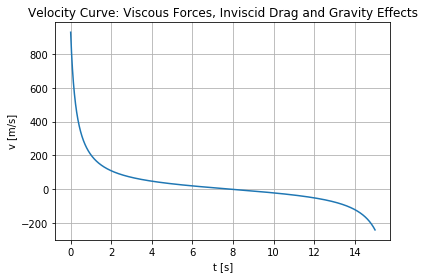

('Apogee with viscous forces:', 772.5892648008032)
('Percentage change between the two cases', 1.8645124633120957e-05)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

g = 9.8
v0 = 928
m = 4.2e-2
c_d = 0.82
A = 3.14e-4
rho = 1.225
L = 4e-2
mu = 1.81e-5
b = mu*A/L

v_trans = 2*mu/(c_d*rho*L)
print(v_trans)


def dv_dt(v,t):
    return -g - (1/(2*m))*rho*(v**2)*c_d*A - b*v

ts = np.linspace(0,15,10000)
vs = odeint(dv_dt, v0, ts)
vs = np.array(vs).flatten()

plt.title('Velocity Curve: Viscous Forces, Inviscid Drag and Gravity Effects')
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.plot(ts, vs)
plt.grid(True, which='both')
plt.show()


zero_crossing = np.where(np.diff(np.sign(vs)))
x_max_viscous = integrate.simps(vs[0:zero_crossing[0][0]], ts[0:zero_crossing[0][0]])
print("Apogee with viscous forces:", x_max_viscous)

reduction_perc = (1-(x_max_viscous/x_max_inv))*100

print("Percentage change between the two cases", reduction_perc)

Indeed, there is little difference between the apogees calculated for Case 1 and Case 2. Each case gives an apogee of roughly __772 m__. It is concluded that, under the parameters of the problem, viscous forces are negligible and the inviscid drag, due to inertial forces of the air, are primarily responsible for slowing the projectile. 

# Conclusion

Under the assumptions of this analysis, the apogee of a Speer .50 caliber bullet with a muzzle velocity of 928 m/s fired straight up shouldn't exceed about __772 m__. This is in stark contrast to the __30 km__ or more estimated by considering the gravitational potential alone. 


Inviscid drag forces greatly reduce the apogee of the projectile in comparison to the "pure gravity" case. Further considering viscous forces in addition to inviscid drag and gravity, the apogee is only reduced by less than a 10,000th of a percent. Thus inviscid drag yields the dominant correction to the "pure gravity" case. 


## Further Notes

This is first pass/back-of-the-envelope analysis. I did not corroborate these results with any empirical study or outside references specific to the subject. 
